In [1]:
# This file uses sentences from ClaimsExtractedByUs to learn the sentence-look_up_value distribution
# considering only unique sentences

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import FeatureUnion
import numpy as np
import matplotlib.pyplot as plt

/home/george/.pyenv/versions/3.7.0/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/george/.pyenv/versions/3.7.0/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
path = "data/annotated_11_19_2019/ClaimsExtractedByUs.csv"

In [4]:
df = pd.read_csv(path, encoding="latin1")

In [5]:
df

,Text,Published value,Author calc Value,Look-up value,Look-up year,Scenario,Fixed_Formulas
0,The Sustainable Development Scenario starts wi...,7,7.1,NaN,NaN,NaN,'C:\Users\Mohammed Saeed\Desktop\Energy Fact C...
1,The Sustainable Development Scenario starts wi...,3.9,3.9,NaN,NaN,NaN,'C:\Users\Mohammed Saeed\Desktop\Energy Fact C...
2,The Sustainable Development Scenario starts wi...,13,13,NaN,NaN,NaN,'C:\Users\Mohammed Saeed\Desktop\Energy Fact C...
3,For the first time the number of people withou...,For the first time,TRUE,NaN,NaN,NaN,'C:\Users\Mohammed Saeed\Desktop\Energy Fact C...
4,For the first time the number of people withou...,fell below 1 billion,TRUE,NaN,NaN,NaN,'C:\Users\Mohammed Saeed\Desktop\Energy Fact C...
5,For the first time the number of people withou...,is declining gradually,TRUE,NaN,NaN,NaN,'C:\Users\Mohammed Saeed\Desktop\Energy Fact C...
6,"Despite significant steps forward in Kenya, Et...",Ethiopia,0.4014,NaN,NaN,NaN,G29-G28
7,Total electrification rate,Tanzania,0.223,Ethiopia,2017,Historic,G32-G31
8,Total electrification rate,Nigeria,0.197945098,Tanzania,2017,Historic,G35-G34
9,Total electrification rate,600 million,TRUE,Nigeria,2017,Historic,'C:\Users\Mohammed Saeed\Desktop\Energy Fact C...


In [184]:
df_lookup = df[df["Fixed_Formulas"].str.contains("LOOKUP")].reset_index(drop=True)

In [185]:
df_lookup

,Text,Published value,Author calc Value,Look-up value,Look-up year,Scenario,Fixed_Formulas
0,Energy-related carbon dioxide (CO2) emissions ...,increased deployment,723.284262,PGINrenew,2016,Historic,"VLOOKUP($A54,G:\EO2018\FrozenResults\Demand\_A..."
1,Energy-related carbon dioxide (CO2) emissions ...,increased deployment,770.4351901,#REF!,#VALUE!,Historic,"VLOOKUP($A55,G:\EO2018\FrozenResults\Demand\_A..."
2,Stronger policy action leads to substantially ...,substantially higher,38.27872429,InvCosts_IND_Eff_Total,cum2040,NaN,"VLOOKUP(A94,G:\EO2018\FrozenResults\Investment..."
3,Stronger policy action leads to substantially ...,substantially higher,309.3837303,InvCosts_TRA_Eff_Total,cum2040,NaN,"VLOOKUP(A95,G:\EO2018\FrozenResults\Investment..."
4,Stronger policy action leads to substantially ...,substantially higher,224.3022014,InvCosts_BLDG_Eff_Total,cum2040,NaN,"VLOOKUP(A96,G:\EO2018\FrozenResults\Investment..."
5,Stronger policy action leads to substantially ...,substantially higher,97.30096692,InvCosts_IND_Eff_Total,cum2040,NaN,"VLOOKUP(A97,G:\EO2018\FrozenResults\Investment..."
6,Stronger policy action leads to substantially ...,substantially higher,338.900707,InvCosts_TRA_Eff_Total,cum2040,NaN,"VLOOKUP(A98,G:\EO2018\FrozenResults\Investment..."
7,Stronger policy action leads to substantially ...,substantially higher,279.5660694,InvCosts_BLDG_Eff_Total,cum2040,NaN,"VLOOKUP(A99,G:\EO2018\FrozenResults\Investment..."
8,Stronger policy action leads to substantially ...,stays close to,13971.58601,TPEDtotal,2017,SDS,"VLOOKUP($A101,G:\EO2018\FrozenResults\Demand\_..."
9,Stronger policy action leads to substantially ...,stays close to,13715.01342,TPEDtotal,2040,SDS,"VLOOKUP($A102,G:\EO2018\FrozenResults\Demand\_..."


In [188]:
df_lookup = df_lookup.drop_duplicates(subset=["Text", "Published value"]).reset_index(drop=True)

In [189]:
df_lookup

,Text,Published value,Author calc Value,Look-up value,Look-up year,Scenario,Fixed_Formulas
0,Energy-related carbon dioxide (CO2) emissions ...,increased deployment,723.284262,PGINrenew,2016,Historic,"VLOOKUP($A54,G:\EO2018\FrozenResults\Demand\_A..."
1,Stronger policy action leads to substantially ...,substantially higher,38.27872429,InvCosts_IND_Eff_Total,cum2040,NaN,"VLOOKUP(A94,G:\EO2018\FrozenResults\Investment..."
2,Stronger policy action leads to substantially ...,stays close to,13971.58601,TPEDtotal,2017,SDS,"VLOOKUP($A101,G:\EO2018\FrozenResults\Demand\_..."
3,Stronger policy action leads to substantially ...,doubling,127177.761,GDP,2017,SDS,"VLOOKUP($A104,G:\EO2018\FrozenResults\Demand\_..."
4,for the first time the number of people withou...,for the first time,1422.12966,PopwoElecAccess,2010,Hist,"HLOOKUP($B278,G:\EO2018\FrozenResults\Demand\A..."
5,In sub-Saharan Africa 600 million people are s...,600 million people,580.67282,PopwoElecAccess,2030,NPS,"HLOOKUP($B321,G:\EO2018\FrozenResults\Demand\A..."
6,Energy-related carbon dioxide (CO2) emissions ...,for the first time in three years,32138.38726,CO2TPEDtotal,2014,Historic,"VLOOKUP($A352,G:\EO2018\FrozenResults\Demand\_..."
7,Energy-related carbon dioxide (CO2) emissions ...,economic growth,122666.148,GDP,2016,Historic,"VLOOKUP($A358,G:\EO2018\FrozenResults\Demand\_..."
8,Energy-related carbon dioxide (CO2) emissions ...,slow-down in efficiency,0.117954653,TPEDperGDP,2014,Historic,"VLOOKUP($A362,G:\EO2018\FrozenResults\Demand\_..."
9,0,increased deployment of renewables,723.284262,PGINrenew,2016,Historic,"VLOOKUP($A372,G:\EO2018\FrozenResults\Demand\_..."


In [10]:
# Experiment 1
# The features will be the text and the label will be the lookup-value here

In [11]:
from src.tokenizer.tokenizer_driver import TokenizerDriver
from src.featurizer.feature_extractor import FeatureExtractor

In [12]:
tok_driver_sents = TokenizerDriver()
tok_driver_claims = TokenizerDriver()
featurizer_tf = FeatureExtractor(mode="tfidf")
featurizer = FeatureExtractor(mode="word-embeddings")

In [13]:
claim_sents = list(df_lookup["Text"])

In [14]:
claim_value = list(df_lookup["Published value"])

In [15]:
tokenized_sents = tok_driver_sents.tokenize_claims(claim_sents)

In [16]:
len(claim_sents), len(tokenized_sents)

(237, 237)

In [17]:
tokenized_claims = tok_driver_claims.tokenize_claims(claim_value)

In [18]:
len(tokenized_claims)

237

In [19]:
features_emb = featurizer.featurize_claims(tokenized_sents)

In [66]:
# tfidf features of the sentences
features_sent_tf = featurizer_tf.featurize_claims(tokenized_sents)

In [20]:
features_tf = featurizer_tf.featurize_claims(tokenized_claims)

In [68]:
features_emb.shape, features_tf.shape, features_sent_tf.shape

((237, 300), (237, 303), (237, 2444))

In [22]:
features_tf = features_tf.toarray()

In [23]:
features = np.concatenate((features_emb, features_tf), axis=1)

In [24]:
labels = list(df_lookup["Look-up value"])

In [25]:
len(labels)

237

In [129]:
X_train.shape, len(y_train), X_test.shape, len(y_test)

((189, 603), 189, (48, 603), 48)

In [130]:
model = LinearSVC()

In [131]:
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [132]:
final_model = CalibratedClassifierCV(base_estimator=model, cv="prefit")

In [133]:
final_model.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
            cv='prefit', method='sigmoid')

In [134]:
def _linear_scale_confidence(confidences):
    """
    return the ratio of prob according to the sum of top n probabilities for the predicted intents.
    if probs = [p1, p2, p3] then the return probabilities will be scaled as
    [p1/sum(p1,p2,p3), p2/sum(p1,p2,p3), p3/sum(p1,p2,p3)]
    Args:
        confidences: probabilities of intents
    Returns:
        numpy array: the scaled confidences
    """
    s = np.sum(confidences)
    return confidences/s

In [135]:
def predict_utt_top_n(mod, featurized_utt, n=3):
    """
    predict the top3 intents along with the confidence probability for each one.
    Note that model.classes_ contains the trained labels in alphabetical order. Here, we sort the
    confidences together with the labels, and return the top3 from this sorted order
    Args:
        featurized_utt (str): featurized and tokenized single utterance
    Returns:
        One list of strings and one list of floats
    """
    raw_confidences = mod.predict_proba(featurized_utt)[0]
    # indices of sorted confidences from high to low confidence
    sorted_conf_idx = np.argsort(raw_confidences)[::-1][:n]
    labels = np.take(mod.classes_, sorted_conf_idx)
    confidences = np.take(raw_confidences, sorted_conf_idx)
    scaled_confidences = _linear_scale_confidence(confidences)

    return labels, scaled_confidences

In [136]:
temp = X_test[0]

In [137]:
predict_utt_top_n(final_model, temp.reshape(1, -1))

(array(['TOTTRANSgas', 'SO2_PP_Total', 'CO2TPEDtotal'], dtype='<U32'),
 array([0.55920556, 0.41272919, 0.02806524]))

In [138]:
predictions = [predict_utt_top_n(final_model, test.reshape(1, -1), n=5) for test in X_test]

In [139]:
predictions

[(array(['TOTTRANSgas', 'SO2_PP_Total', 'CO2TPEDtotal', 'TFCbiomass',
         'NG_PROD'], dtype='<U32'),
  array([0.54301198, 0.4007773 , 0.02725253, 0.01496122, 0.01399696])),
 (array(['CO2TPEDtotal', 'TOTTRANSelec', 'TOTINDtotal', 'GDP',
         'SO2_Ind_Total'], dtype='<U32'),
  array([0.83557225, 0.06404773, 0.0618187 , 0.02367343, 0.01488788])),
 (array(['VehicleRoadStock_Ecars', 'FuelEconomyStockLitres_PLDV',
         'AddPop_LPG', 'TOTTRANSoil', 'CF_ElecOnly_Coal_Subcritical'],
        dtype='<U32'),
  array([0.70136883, 0.24790368, 0.02189323, 0.01611059, 0.01272366])),
 (array(['TFCcoal', 'PGOUTcoal', 'PGCapAddrenew', 'TPEDtotal', 'TFCbiomass'],
        dtype='<U32'),
  array([0.81545973, 0.112566  , 0.02982516, 0.02331933, 0.01882978])),
 (array(['CO2TPEDtotal', 'PM_Bldg_Total', 'European Union',
         'INDIC_CO2_TPEDpercapita', 'CO2PGINtotal'], dtype='<U32'),
  array([0.70701431, 0.14887598, 0.06176859, 0.04338829, 0.03895283])),
 (array(['FuelEconomyStockLitres_PLDV', 

In [140]:
len(y_test)

48

In [141]:
len(prediction_labels)

48

In [142]:
prediction_labels = [pred[0][0] for pred in predictions]

In [143]:
n_correct = np.sum(y_test == prediction_labels)
accuracy = float(n_correct / len(y_test))

In [144]:
n_correct

0

In [145]:
num_correct = 0
for test, pred in zip(y_test, predictions):
    topn = pred[0]
    if test in topn:
        num_correct += 1

/Users/georgekaragiannis/.pyenv/versions/3.5.6/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [146]:
num_correct / len(y_test)

0.3125

In [152]:
len(df_lookup.drop_duplicates(subset="Look-up value"))

127

In [190]:
df_lookup["row_id"] = df_lookup.index.values

In [191]:
df_lookup

,Text,Published value,Author calc Value,Look-up value,Look-up year,Scenario,Fixed_Formulas,row_id
0,Energy-related carbon dioxide (CO2) emissions ...,increased deployment,723.284262,PGINrenew,2016,Historic,"VLOOKUP($A54,G:\EO2018\FrozenResults\Demand\_A...",0
1,Stronger policy action leads to substantially ...,substantially higher,38.27872429,InvCosts_IND_Eff_Total,cum2040,NaN,"VLOOKUP(A94,G:\EO2018\FrozenResults\Investment...",1
2,Stronger policy action leads to substantially ...,stays close to,13971.58601,TPEDtotal,2017,SDS,"VLOOKUP($A101,G:\EO2018\FrozenResults\Demand\_...",2
3,Stronger policy action leads to substantially ...,doubling,127177.761,GDP,2017,SDS,"VLOOKUP($A104,G:\EO2018\FrozenResults\Demand\_...",3
4,for the first time the number of people withou...,for the first time,1422.12966,PopwoElecAccess,2010,Hist,"HLOOKUP($B278,G:\EO2018\FrozenResults\Demand\A...",4
5,In sub-Saharan Africa 600 million people are s...,600 million people,580.67282,PopwoElecAccess,2030,NPS,"HLOOKUP($B321,G:\EO2018\FrozenResults\Demand\A...",5
6,Energy-related carbon dioxide (CO2) emissions ...,for the first time in three years,32138.38726,CO2TPEDtotal,2014,Historic,"VLOOKUP($A352,G:\EO2018\FrozenResults\Demand\_...",6
7,Energy-related carbon dioxide (CO2) emissions ...,economic growth,122666.148,GDP,2016,Historic,"VLOOKUP($A358,G:\EO2018\FrozenResults\Demand\_...",7
8,Energy-related carbon dioxide (CO2) emissions ...,slow-down in efficiency,0.117954653,TPEDperGDP,2014,Historic,"VLOOKUP($A362,G:\EO2018\FrozenResults\Demand\_...",8
9,0,increased deployment of renewables,723.284262,PGINrenew,2016,Historic,"VLOOKUP($A372,G:\EO2018\FrozenResults\Demand\_...",9


In [234]:
# Get labels vs sentence-claim pairs distribution
group_count_df = df_lookup.groupby(by="Look-up value").count()[["Text"]].sort_values(by="Text", ascending=False)

In [235]:
group_count_df

,Text
Look-up value,
CO2TPEDtotal,27
Pop_WoCleanCookingAccess,11
PopwoElecAccess,9
CO2PGINtotal,7
GDP,5
TPEDtotal,5
InvAccess_cookingtotal,5
TPEDperGDP,4
PGOUTtotal,4


In [236]:
group_count_df.to_csv("data/vlookup_exps/label_sentence_count_distr.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15829c7b8>]],
      dtype=object)

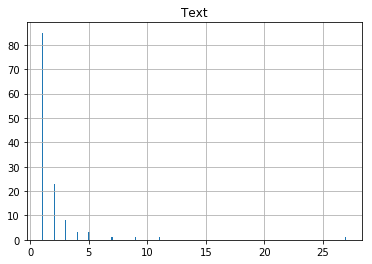

In [228]:
group_count_df.hist(bins=len(labels))

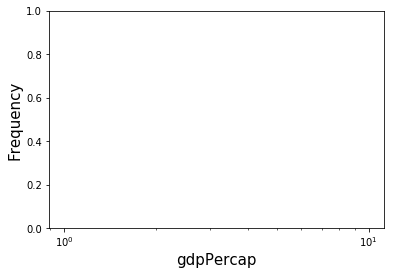

In [229]:
plt.xlabel("gdpPercap", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xscale('log')